In [42]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import numpy as np

import datetime as dt

In [70]:
df = pd.read_csv("Resources/all_departments_percent.csv")

df

,movie_id,release_date,percent_female
0,862,1995-10-30,0.181818
1,8844,1995-12-15,0.000000
2,15602,1995-12-22,0.000000
3,31357,1995-12-22,0.333333
4,11862,1995-02-10,0.500000
...,...,...,...
30921,390959,2000-10-22,0.250000
30922,289923,2000-10-03,0.000000
30923,222848,1995-01-01,0.000000
30924,30840,1991-05-13,0.500000


In [71]:
# sort data by release_date
df=df.sort_values("release_date")

df

,movie_id,release_date,percent_female
14122,83015,1950-01-01,0.0
17992,43387,1950-01-01,0.0
20380,43395,1950-01-01,0.0
18407,109364,1950-01-01,0.0
25041,51411,1950-01-04,0.0
...,...,...,...
24202,302349,2018-03-01,0.0
26797,332283,2018-04-25,0.0
22363,38700,2018-11-07,0.0
27230,299782,2018-12-31,0.0


In [72]:
# change release_date column from string to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [73]:
df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
dtype: object

In [74]:
# Use Pandas.to_datetime() and datetime.strftime() method to add year_month column
df['year_month'] = pd.to_datetime(df['release_date']).dt.strftime('%Y-%m')

In [75]:
df

,movie_id,release_date,percent_female,year_month
14122,83015,1950-01-01,0.0,1950-01
17992,43387,1950-01-01,0.0,1950-01
20380,43395,1950-01-01,0.0,1950-01
18407,109364,1950-01-01,0.0,1950-01
25041,51411,1950-01-04,0.0,1950-01
...,...,...,...,...
24202,302349,2018-03-01,0.0,2018-03
26797,332283,2018-04-25,0.0,2018-04
22363,38700,2018-11-07,0.0,2018-11
27230,299782,2018-12-31,0.0,2018-12


In [76]:
df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month                object
dtype: object

In [77]:
# convert year_month column to datetime format
df['year_month'] = pd.to_datetime(df['year_month'])

In [78]:
df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month        datetime64[ns]
dtype: object

In [79]:
# convert year_month to ordinal for ML
df['year_month']=df['year_month'].map(dt.datetime.toordinal)

In [80]:
df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month                 int64
dtype: object

In [81]:
# group by year and average female_percent for all movies that year
count_df = df.groupby(['year_month'])['percent_female'].mean()

In [82]:
count_df

year_month
711858    0.019608
711889    0.028205
711917    0.017857
711948    0.000000
711978    0.055556
            ...   
736754    0.000000
736785    0.000000
736999    0.000000
737029    0.000000
737760    0.000000
Name: percent_female, Length: 821, dtype: float64

In [83]:
# turn series to dataframe 
dataframe = count_df.to_frame()

DONT RERUN

In [84]:
# change year from axis to column 
dataframe = dataframe.rename_axis('year_month').reset_index()

In [85]:
dataframe

,year_month,percent_female
0,711858,0.019608
1,711889,0.028205
2,711917,0.017857
3,711948,0.000000
4,711978,0.055556
...,...,...
816,736754,0.000000
817,736785,0.000000
818,736999,0.000000
819,737029,0.000000


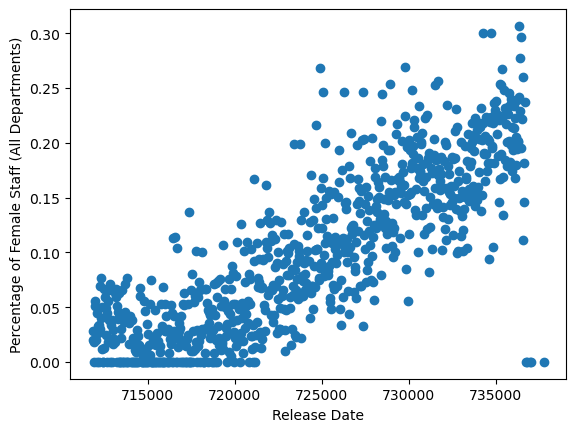

In [86]:
plt.scatter(dataframe.year_month, dataframe.percent_female)
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Staff (All Departments)')
plt.show()

In [87]:
X = dataframe.year_month.values.reshape(-1, 1)


In [88]:
X

array([[711858],
       [711889],
       [711917],
       [711948],
       [711978],
       [712009],
       [712039],
       [712070],
       [712101],
       [712131],
       [712162],
       [712192],
       [712223],
       [712254],
       [712282],
       [712313],
       [712343],
       [712374],
       [712404],
       [712435],
       [712466],
       [712496],
       [712527],
       [712557],
       [712588],
       [712619],
       [712648],
       [712679],
       [712709],
       [712740],
       [712770],
       [712801],
       [712832],
       [712862],
       [712893],
       [712923],
       [712954],
       [712985],
       [713013],
       [713044],
       [713074],
       [713105],
       [713135],
       [713166],
       [713197],
       [713227],
       [713258],
       [713288],
       [713319],
       [713350],
       [713378],
       [713409],
       [713439],
       [713470],
       [713500],
       [713531],
       [713562],
       [713592],
       [713623

In [89]:
X.shape

(821, 1)

In [90]:
y = dataframe.percent_female

y

0      0.019608
1      0.028205
2      0.017857
3      0.000000
4      0.055556
         ...   
816    0.000000
817    0.000000
818    0.000000
819    0.000000
820    0.000000
Name: percent_female, Length: 821, dtype: float64

In [93]:
model = LinearRegression()

In [94]:
model.fit(X, y)

LinearRegression()

In [95]:
y_pred = model.predict(X)
print(y_pred.shape)

(821,)


In [96]:
type(y)

pandas.core.series.Series

In [97]:
type(X)

numpy.ndarray

In [98]:
# turn X from numpy array to Series
date_transform = pd.Series(list(X))

In [99]:
date_transform

0      [711858]
1      [711889]
2      [711917]
3      [711948]
4      [711978]
         ...   
816    [736754]
817    [736785]
818    [736999]
819    [737029]
820    [737760]
Length: 821, dtype: object

In [100]:
type(date_transform)

pandas.core.series.Series

In [101]:
# turn date_transform from ordinal to timestamp
# https://stackoverflow.com/questions/55224227/convert-a-column-of-dates-from-ordinal-numbers-to-the-standard-date-format-pan
date_transform = date_transform.apply(dt.datetime.fromordinal)

In [102]:
date_transform

0     1950-01-01
1     1950-02-01
2     1950-03-01
3     1950-04-01
4     1950-05-01
         ...    
816   2018-03-01
817   2018-04-01
818   2018-11-01
819   2018-12-01
820   2020-12-01
Length: 821, dtype: datetime64[ns]

In [103]:
type(date_transform)

pandas.core.series.Series

In [106]:
# Use Pandas.to_datetime() and datetime.strftime() method to change to year_month format
date_transform = pd.to_datetime(date_transform).dt.strftime('%Y-%m')

In [107]:
date_transform

0      1950-01
1      1950-02
2      1950-03
3      1950-04
4      1950-05
        ...   
816    2018-03
817    2018-04
818    2018-11
819    2018-12
820    2020-12
Length: 821, dtype: object

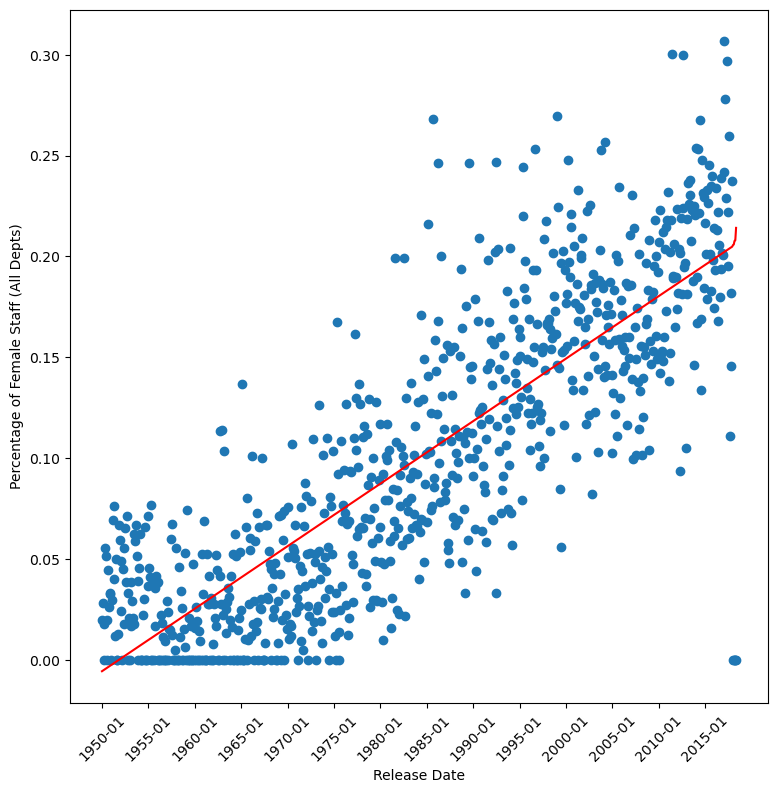

In [108]:
plt.figure(figsize=(9,9))

plt.scatter(date_transform, y)
plt.plot(date_transform, y_pred, color='red')
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Staff (All Depts)')


# https://stackabuse.com/change-tick-frequency-in-matplotlib/
plt.xticks(np.arange(0, len(date_transform)+1, 60),rotation=45)

plt.show()

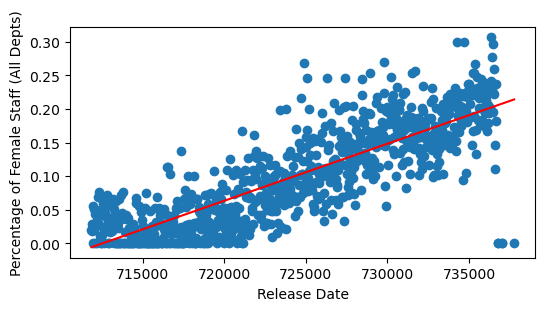

In [38]:
# GRAPH IF YOU DON'T CONVERT X AXIS FROM ORDINAL TO DATETIME

# plt.figure(figsize=(6,3))

# plt.scatter(X, y)
# plt.plot(X, y_pred, color='red')
# plt.xlabel('Release Date')
# plt.ylabel('Percentage of Female Staff (All Depts)')

# plt.show()

In [111]:
print(model.coef_)
print(model.intercept_)

[8.48780221e-06]
-6.04776129535045
